<a href="https://colab.research.google.com/github/RafaelVendiciano/Portfolio/blob/master/Analisando_dados_do_COVID_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Panorama do COVID-19

O Coronavírus é uma família de vírus que causam infecções respiratórias. O novo agente do coronavírus foi descoberto em 31/12/19 após casos registrados na China.

Já COVID-19 é uma doença causada pelo coronavírus SARS-CoV-2

Transmitido principalmente por meio de gotículas provenientes de tosses ou espirros de pessoas infectadas, a gravidade dos sintomas varia muito de pessoa para pessoa.

Fato é, não se sabe muita coisa a respeito do COVID-19. Estudos estão sendo realizados no mundo todo, porém os resultados ainda não são conclusivos e definitivos.

<p align=center>
  <img src="https://www.guarulhos.sp.gov.br/sites/default/files/field/image/covid-19-thumbnail-700x324_0.jpg" height="300px">
</p>

Até o presente momento, observa-se que cerca de 80% dos casos confirmados são assintomáticos e rápidos. A maioria das pessoas que se encaixam nesse grupo, se recupera sem nenhuma sequela.

No entanto, 15% das pessoas terão infecções graves e precisarão de oxigênio. O restante das pessoas, que representam 5%, serão classificadas como infecções muito graves e precisarão de ventilação assistida, por meio de respiradores mecânicos em ambiente hospitalar.

Com o objetivo de elevar a consciência situacional a respeito do COVID-19 no Brasil, irei realizar uma análise sobre os dados públicos da doença.

## Obtenção dos Dados

Os dados que serão usados aqui vieram do site [*Our Wold in Data*](https://ourworldindata.org/coronavirus), porém, como o *dataset* é constantemente atualizado, para essa análise, utilizei informações que vão até 14 de junho de 2020.

Há certas complicações ao se analisar dados de uma nova doença, principalmente no Brasil, por causa do prazo para que estados e municípios informem ao Ministério da Saúde o número de mortes e infecções de covid-19, conflitos entre dados dos governos federal, estaduais e os não oficiais, etc... Isso acaba refletindo na divulgação dos casos.

### Importando os dados do COVID-19:

In [ ]:
# importar as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# importar o dataset COVID-19 para um DataaFrame
df = pd.read_csv('https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/owid-covid-data.csv')

## Análise Exploratória dos Dados

Nessa fase iremos examinar o dataset, para que possamos tanto entender como o os dados estão estruturados, quanto retirar informações importantes.




### Análise Inicial
Para nos familiarizar com o banco de dados, é sempre importante no começo da análise observar a estrutura das informações, tanto quanto quais são as variáveis que estão sendo tratadas.

In [ ]:
# Formato do dataset
df.shape

(24023, 33)

In [ ]:
# Colunas do dataset
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cvd_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand'],
      dtype='object')

In [ ]:
# primeiras linhas do dataset
df.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand
0,AFG,Asia,Afghanistan,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
1,AFG,Asia,Afghanistan,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
2,AFG,Asia,Afghanistan,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
3,AFG,Asia,Afghanistan,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5
4,AFG,Asia,Afghanistan,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5


Como podemos ver acima, o *dataset* é formado de 24023 linhas e 33 colunas, das quais nos informam sobre diversos assuntos como: continente, local, data, casos novos, total de mortes, novas mortes, etc...

Algumas outras coisas essenciais a se fazer é verificar quais os tipos das variáveis, ou seja, o tipo de informação que cada coluna transmite, podendo ser dados númericos ou categóricos, e quantos dados ausentes existem no *dataset*.

In [ ]:
# Tipos das variáveis
df.dtypes

iso_code                            object
continent                           object
location                            object
date                                object
total_cases                        float64
new_cases                          float64
total_deaths                       float64
new_deaths                         float64
total_cases_per_million            float64
new_cases_per_million              float64
total_deaths_per_million           float64
new_deaths_per_million             float64
total_tests                        float64
new_tests                          float64
total_tests_per_thousand           float64
new_tests_per_thousand             float64
new_tests_smoothed                 float64
new_tests_smoothed_per_thousand    float64
tests_units                         object
stringency_index                   float64
population                         float64
population_density                 float64
median_age                         float64
aged_65_old

In [ ]:
# Calculo porcentagem de valores ausentes por coluna
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

new_tests                          0.759397
new_tests_per_thousand             0.759397
total_tests                        0.731632
total_tests_per_thousand           0.731632
new_tests_smoothed                 0.709070
new_tests_smoothed_per_thousand    0.709070
tests_units                        0.683928
handwashing_facilities             0.596262
extreme_poverty                    0.401657
male_smokers                       0.277775
female_smokers                     0.269533
stringency_index                   0.208425
hospital_beds_per_thousand         0.168755
aged_65_older                      0.107147
gdp_per_capita                     0.104317
aged_70_older                      0.099155
median_age                         0.094534
cvd_death_rate                     0.093619
diabetes_prevalence                0.064438
population_density                 0.042543
new_cases_per_million              0.011739
new_deaths_per_million             0.011739
total_deaths_per_million        

Acima, podemos ver que a maioria dos dados são float, ou seja, números. Além disso, muitas colunas tem dados ausentes, inclusive algumas chegam a ter mais de 70% das informações faltando.

Antes de prosseguir, é importante, para que seja possível trabalhar melhor com as datas, transformar a variável de `object` para `datetime`.

In [ ]:
# transformar o tipo de data para datetime
df.date = pd.to_datetime(df.date)

### Análise Exploratória

Durante esta parte, iremos calcular estatísticas desse grande conjunto de dados para podermos retirar informações realmente importantes.

Primeiramente, vamos ver quais países, na data atual, têm mais casos e mortes.

In [ ]:
# Calculo países com maior numero de casos totais até 14/06/2020
df.loc[df.date == '2020-06-14', ['location', 'total_cases']].sort_values(by='total_cases', ascending=False).reset_index(drop=True)[1:6]


,location,total_cases
1,United States,2074526.0
2,Brazil,850514.0
3,Russia,520129.0
4,India,320922.0
5,United Kingdom,294375.0


In [ ]:
# Calculo países com maior numero de mortes totais até 14/06/2020
df.loc[df.date == '2020-06-14', ['location', 'total_deaths']].sort_values(by='total_deaths', ascending=False).reset_index(drop=True)[1:6]


,location,total_deaths
1,United States,115436.0
2,Brazil,42720.0
3,United Kingdom,41662.0
4,Italy,34301.0
5,France,29398.0


Como as tabelas acima informam, os EUA e Brasil são líderes em quantidade absoluta de casos e mortes devido ao COVID-19 até 14/06/2020.

Quanto a total de casos, logo após o Brasil, vem a Russia e  Índia. O que não surpreende tanto devido a quantidade populacional desses países.

Porém, o Reino Unido, que tem uma população muito menor que os outros países listados, aparece em quinto lugar em total de casos e terceiro em total de mortes, evidênciando problemas em lidar com o vírus, juntamente com Itália e França, que mesmo não aparecendo no top 5 países com maiores números de casos, estão com alta taxa de mortes pelo COVID-19.

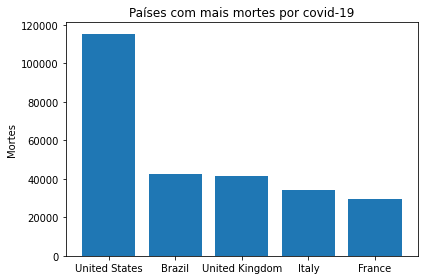

In [ ]:
# Gráfico países com maiores mortes
top5 = df.loc[df.date == '2020-06-14', ['location', 'total_deaths']].sort_values(by='total_deaths', ascending=False)[1:6]

fig, ax = plt.subplots()
ax.bar('location', 'total_deaths', data=top5)
ax.set_title('Países com mais mortes por covid-19')
ax.set_ylabel('Mortes')
plt.tight_layout()

Agora, vou plotar gráficos de linha para vermos a evolução do contágio do COVID-19 pelo mundo.

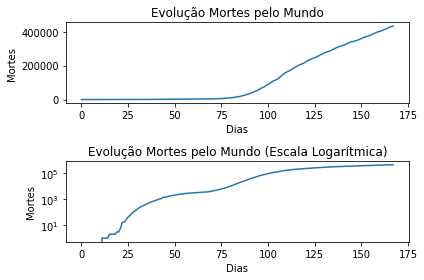

In [ ]:
# Gráfico contágio COVID-19 pelo mundo
x = list(range(168))
y = df.loc[df.location == 'World', 'total_deaths']
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
ax1.set_title('Evolução Mortes pelo Mundo')
ax1.set_xlabel('Dias')
ax1.set_ylabel('Mortes')
ax1.plot(x, y)

ax2.set_title('Evolução Mortes pelo Mundo (Escala Logarítmica)')
ax2.set_xlabel('Dias')
ax2.set_ylabel('Mortes')
ax2.set_yscale('log')
ax2.plot(x, y)
plt.tight_layout()

O gráfico de cima nos mostra a evolução numerica absoluta, enquanto a debaixo mosta a evolução proporcional.

### Análise Exploratória para o Brasil

Para esta parte da análise, vou dar atenção apenas ao Brasil para que possamos ver a situação do nosso país.

Vou começar criando um *dataset*, a partir do antigo, apenas do Brasil.

In [ ]:
# Criando dataset para o Brasil
df_brasil = df.loc[df.location == "Brazil"].reset_index(drop=True).copy()
df_brasil.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand
0,BRA,South America,Brazil,2019-12-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2
1,BRA,South America,Brazil,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2
2,BRA,South America,Brazil,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2
3,BRA,South America,Brazil,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2
4,BRA,South America,Brazil,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,212559409.0,25.04,33.5,8.552,5.06,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.2


Dados de morte no Brasil:

Agora, vamos idenficar quando foi registrada a primeira morte e quantos dias demorou para registrarmos a primeira morte depois do primeiro caso de COVID-19 registrado.

In [ ]:
# Calculando data da primeira morte por COVID-19 no Brasil
df_brasil.loc[df_brasil.new_deaths == 1.0, ['location', 'date', 'new_cases','total_cases', 'new_deaths', 'total_deaths']].reset_index(drop=True).head(1)

,location,date,new_cases,total_cases,new_deaths,total_deaths
0,Brazil,2020-03-18,57.0,291.0,1.0,1.0


A primeira morte por COVID-19 no Brasil ocorreu no dia 18/03/2020.

In [ ]:
# Calcuando primeiro registro
df.loc[(df.new_cases >= 1.0) & (df.location != 'World'), ['location', 'date', 'new_cases','total_cases', 'new_deaths', 'total_deaths']].sort_values(by='date').reset_index(drop=True).head(1)

,location,date,new_cases,total_cases,new_deaths,total_deaths
0,China,2019-12-31,27.0,27.0,0.0,0.0


In [ ]:
# Calcuando primeiro registro no Brasil
df.loc[(df.new_cases >= 1.0) & (df.location == 'Brazil'), ['location', 'date', 'new_cases','total_cases', 'new_deaths', 'total_deaths']].sort_values(by='date').reset_index(drop=True).head(1)

,location,date,new_cases,total_cases,new_deaths,total_deaths
0,Brazil,2020-02-26,1.0,1.0,0.0,0.0


Como vimos, a primeira morte por COVID-19 no Brasil ocorreu em 18/03/2020, enquanto o primeiro registro de casos do novo coronavírus foi dia 31/12/2019 na China. Já o primeiro caso no Brasil foi em 26/02/2020.

Ou seja, depois de 78 dias do primeiro caso no mundo e de 21 dias do primeiro caso no Brasil, ocorreu a primeira morte aqui.

Para ter uma melhor ideia da evolução dos acontecimentos, vou plotar gráficos para casos e mortes de covid-19 no brasil.

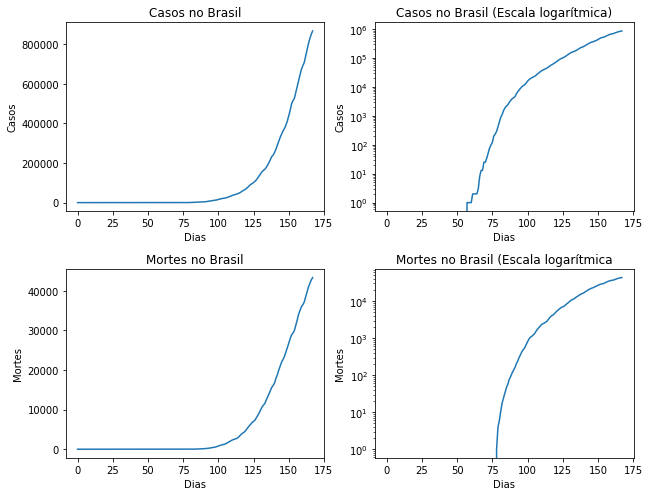

In [ ]:
#Gráficos de casos e mortes de covid-19 no Brasil
x = list(range(168))
z = df_brasil['total_cases']
z2 = df_brasil['total_deaths']

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(9, 7))
ax1.set_title('Casos no Brasil')
ax1.set_xlabel('Dias')
ax1.set_ylabel('Casos')
ax1.plot(x, z)

ax2.set_title('Casos no Brasil (Escala logarítmica)')
ax2.set_xlabel('Dias')
ax2.set_ylabel('Casos')
ax2.set_yscale('log')
ax2.plot(x, z)

ax3.set_title('Mortes no Brasil')
ax3.set_xlabel('Dias')
ax3.set_ylabel('Mortes')
ax3.plot(x, z2)

ax4.set_title('Mortes no Brasil (Escala logarítmica')
ax4.set_xlabel('Dias')
ax4.set_ylabel('Mortes')
ax4.set_yscale('log')
ax4.plot(x, z2)
plt.tight_layout()

## Conclusão

Fizemos uma breve análise sobre os dados disponíveis do novo coronavírus.

Mesmo apenas usando colunas com poucos valores nulos, já deu para tirar diversas informações dos dados, como os países com piores números absolutos, a forma que o vírus evoluiu, depois de quanto tempo do primeiro caso na China e no Brasil ocorreu a primeira morte aqui, etc...

Espero que esse projeto possa ter sido útil!